In [1]:
# Import statements
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# uploading the training data
uploaded_train = files.upload()

Saving train41.csv to train41 (1).csv


In [3]:
# uploading the testing data
uploaded_test = files.upload()

Saving test41.csv to test41 (1).csv


In [4]:
# reading train_data from training data set

df1 = pd.read_csv(io.BytesIO(uploaded_train['train41.csv']))

train_data = df1.to_numpy()
train_data = train_data.transpose()
print(train_data)

[[6.91765089e+02 1.15473496e+03 1.79027964e+03 2.29425562e+03
  1.73643825e+03 1.42226815e+03 1.52648972e+03 2.10985433e+03
  1.36862759e+03 2.04029467e+03 1.70754436e+03 1.82432344e+03
  5.00000000e+02 2.46719596e+03 1.05227441e+03 2.08940422e+03
  1.65541459e+03 2.94013888e+03 2.24700642e+03 2.12621937e+03
  1.43023941e+03 2.63227240e+03 1.45812808e+03 1.93034425e+03
  2.00171777e+03 1.26216113e+03 1.54801752e+03 1.39331647e+03
  1.80134504e+03 2.10410241e+03 2.12996156e+03 2.14987579e+03
  1.18545225e+03 1.71128897e+03 1.41217399e+03 1.42437788e+03
  2.29510832e+03 8.15333105e+02 1.19183978e+03 1.98630600e+03
  2.32439533e+03 1.53670984e+03 1.56077985e+03 1.19973918e+03
  1.42307290e+03 1.52414989e+03 1.27904017e+03 8.05420324e+02
  2.17504853e+03 2.42884036e+03 1.44236517e+03 1.83306385e+03
  1.75462197e+03 1.46995048e+03 1.59070193e+03 1.57016069e+03
  1.83933261e+03 2.02783277e+03 2.92218637e+03 1.27929370e+03
  1.58043615e+03 1.84608508e+03 2.21248192e+03 2.31181803e+03
  1.6021

In [5]:
# reading test_data from testing data set

df2 = pd.read_csv(io.BytesIO(uploaded_test['test41.csv']))

test_data = df2.to_numpy()
test_data = test_data.transpose()
print(test_data)


[[2.59465102e+03 1.27324291e+03 1.77207402e+03 1.96062521e+03
  3.00000000e+03 1.08091325e+03 2.40328725e+03 1.74381184e+03
  2.01639325e+03 7.84789636e+02 1.84122863e+03 1.25357208e+03
  1.42759033e+03 1.65850430e+03 1.48867390e+03 1.47488280e+03
  2.19527988e+03 1.60727697e+03 1.99298729e+03 2.45561852e+03]
 [8.37860407e+01 3.09297164e+01 5.08829609e+01 5.84250086e+01
  1.00000000e+02 2.32365301e+01 7.61314899e+01 4.97524736e+01
  6.06557299e+01 1.13915854e+01 5.36491452e+01 3.01428830e+01
  3.71036132e+01 4.63401719e+01 3.95469561e+01 3.89953119e+01
  6.78111954e+01 4.42910788e+01 5.97194918e+01 7.82247410e+01]
 [8.10813819e+04 1.22834237e+05 1.18236735e+05 1.17455226e+05
  2.00000000e+04 1.20371260e+05 9.81314435e+04 1.18237304e+05
  1.15295107e+05 1.29177162e+05 1.17602182e+05 1.18462238e+05
  1.18342437e+05 1.18464890e+05 1.20303915e+05 1.18342423e+05
  1.09722772e+05 1.18488053e+05 1.15789851e+05 9.43492145e+04]]


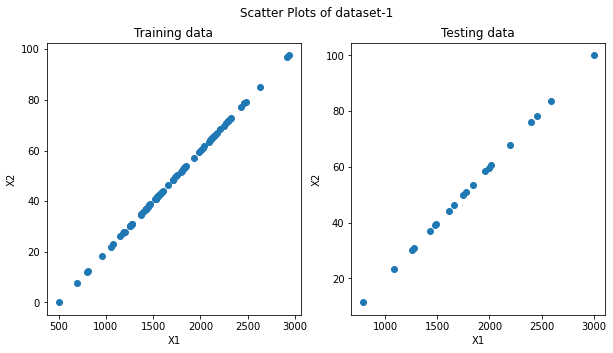

In [6]:
X1_train = np.array(train_data[0])
X2_train = np.array(train_data[1])
Y_train = train_data[2]

X1_test = np.array(test_data[0])
X2_test = np.array(test_data[1])
Y_test = test_data[2]

# create a figure with subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.scatter(X1_train, X2_train)
ax1.set_title('Training data')
ax2.scatter(X1_test, X2_test)
ax2.set_title('Testing data')

fig.suptitle('Scatter Plots of dataset-1')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')

plt.show()

# seperating the training and validation data

validation_data = train_data[:,math.ceil(train_data.shape[1]*0.8):]
train_data_1 = train_data[:,:math.ceil(train_data.shape[1]*0.8)]

X1_validation = np.array(validation_data[0])
X2_validation = np.array(validation_data[1])
Y_validation = validation_data[2]

X1_train = np.array(train_data_1[0])
X2_train = np.array(train_data_1[1])
Y_train = train_data_1[2]


From the above scatter plots we see that X1 and X2 are correlated with X2 = K*X1, where k is a constant. So we are ignoring X2 and considering only one independent parameter X1.

In [7]:
# creating a class for linear regression

class Linear_Regression:

  def __init__(self,d):
    self.d = d

  def fit(self,X,Y):

    X_train_matrix = np.ones(len(X))

    for i in range(1,self.d+1):
      X_train_matrix = np.vstack((X**i,X_train_matrix))
    
    X_train_matrix = X_train_matrix.transpose()
    cov_X_train_matrix = np.dot(X_train_matrix.transpose(),X_train_matrix)
    cov_XY_train_matrix = np.dot(X_train_matrix.transpose(),Y)

    self.beta = np.dot(np.linalg.inv(cov_X_train_matrix),cov_XY_train_matrix)

  def predict(self,X_test):

    X_test_matrix = np.ones(len(X_test))
    for i in range(1,self.d+1):
      X_test_matrix = np.vstack((X_test**i,X_test_matrix))
    X_test_matrix = X_test_matrix.transpose()
    
    Y = np.dot(X_test_matrix,self.beta)

    return Y
  


1) a) plotting the f(x) for x for different degree polynomials 

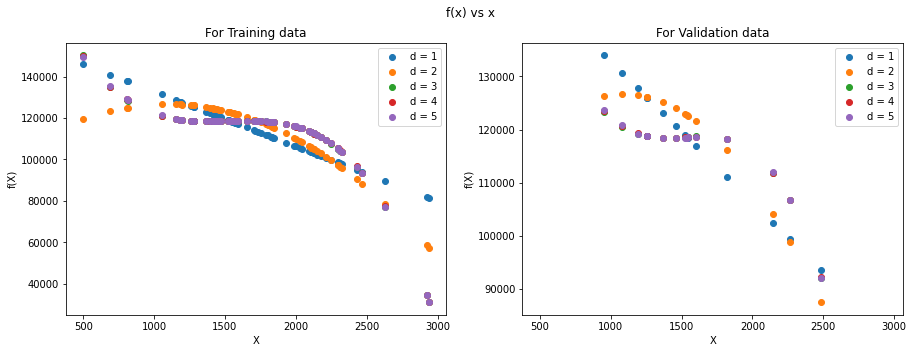

In [8]:
# plotting for the training and validation data for degree from 1 to 5

max_degree = 5

final_array = []

fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=True)

for d in range(1,max_degree+1):
  string = "d = "+str(d)

  lsq = Linear_Regression(d)   # calling the Linear_Regression class
  lsq.fit(X1_train,Y_train)    # function for fitting the linear regreesion line on the training datas
  Y_train_ml = lsq.predict(X1_train)   # predicting the values
  Y_validation_ml = lsq.predict(X1_validation)

  axs[0].scatter(X1_train, Y_train_ml, label=string)
  axs[1].scatter(X1_validation, Y_validation_ml, label=string)

# plotting
fig.suptitle('f(x) vs x')
axs[0].set_xlabel('X')
axs[0].set_ylabel('f(X)')
axs[0].set_title("For Training data")
axs[0].legend()

axs[1].set_xlabel('X')
axs[1].set_ylabel('f(X)')
axs[1].set_title("For Validation data")
axs[1].legend()

plt.show()



  



b) plotting MSE vs degree of polynomial for the Training and Validation data

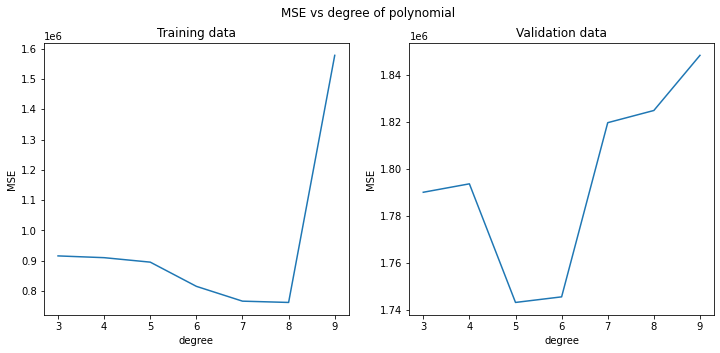

In [26]:
max_degree = 11     # Maximum degree upto which MSE will be calculated

final_array_MSE = []
final_array_MSE_validation = []
final_d_array = []

for d in range(1,max_degree+1):

  lsq = Linear_Regression(d)
  lsq.fit(X1_train,Y_train)

  Y_ml = lsq.predict(X1_train)
  Y_ml_validation = lsq.predict(X1_validation)

  final_array_MSE += [np.mean((Y_ml-Y_train)**2)]
  final_array_MSE_validation += [np.mean((Y_ml_validation-Y_validation)**2)]
  final_d_array += [d]
                                                                                                                                                                                                                          

# plotting

fig, axs = plt.subplots(1, 2, figsize=(12,5), sharex=True)

axs[0].plot(final_d_array[2:9],final_array_MSE[2:9])
axs[1].plot(final_d_array[2:9],final_array_MSE_validation[2:9])

fig.suptitle('MSE vs degree of polynomial')
axs[0].set_xlabel('degree')
axs[0].set_ylabel('MSE')
axs[0].set_title("Training data")

axs[1].set_xlabel('degree')
axs[1].set_ylabel('MSE')
axs[1].set_title("Validation data")

plt.show()



c) Getting the best polynomial fit using the validation data and finding the MSE for training data and testing data.

In [48]:
final_array_MSE = np.array(final_array_MSE_validation[2:9])  
best_degree_train = np.argmin(final_array_MSE)+3    # finding the best polynomial degree

print("best degree polynomial from validation data = ",best_degree_train,"\n")

lsq = Linear_Regression(best_degree_train)
lsq.fit(X1_train,Y_train)
Y_ml_train = lsq.predict(X1_train)

MSE_train = np.mean((Y_ml_train - Y_train)**2)

print("MSE of the best fit for training data = ",MSE_train)

Y_ml_test = lsq.predict(X1_test)

MSE_test = np.mean((Y_ml_test - Y_test)**2)

print("MSE of the best fit for testing data = ",MSE_test)



best degree polynomial for validation data =  5 

MSE of the best fit for training data =  894991.0458308207
MSE of the best fit for testing data =  1206154.1328425892


d) Plotting the scatter plot of best model output vs expected output for both train and test data.

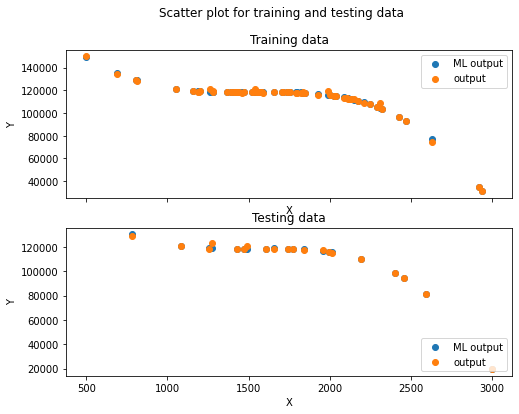

In [31]:
# training data

# create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# plot data on the subplots and set labels
axs[0].scatter(X1_train, Y_ml_train, label='ML output')
axs[0].scatter(X1_train, Y_train, label='output')
axs[0].set_ylabel('Y')
axs[0].set_xlabel('X')

axs[1].scatter(X1_test, Y_ml_test, label='ML output')
axs[1].scatter(X1_test, Y_test, label='output')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

# create legends for the subplots
axs[0].legend(loc='upper right')
axs[1].legend(loc='lower right')
axs[0].set_title("Training data")
axs[1].set_title("Testing data")

# set the title for the figure
fig.suptitle('Scatter plot for training and testing data')

# show the plot
plt.show()



**Ridge Regression**

1)(b) 

In [32]:
# Defining a class of ridge regression and it's methods

class Ridge_Regression:

  def __init__(self,d,lambda_):
    self.d = d
    self.lambda_ = lambda_

  def fit(self,X,Y):                      # fits the curve in the given input data

    X_train_matrix = np.ones(len(X))

    for i in range(1,self.d+1):
      X_train_matrix = np.vstack((X**i,X_train_matrix))
    
    X_train_matrix = X_train_matrix.transpose()
    cov_X_train_matrix = np.dot(X_train_matrix.transpose(),X_train_matrix)
    cov_XY_train_matrix = np.dot(X_train_matrix.transpose(),Y)

    temp_matrix = cov_X_train_matrix + self.lambda_ * np.identity(self.d + 1)

    self.beta = np.dot(np.linalg.inv(temp_matrix),cov_XY_train_matrix)

  def predict(self,X_test):               # predicts the output for the given input data

    X_test_matrix = np.ones(len(X_test))
    for i in range(1,self.d+1):
      X_test_matrix = np.vstack((X_test**i,X_test_matrix))
    X_test_matrix = X_test_matrix.transpose()
    
    Y = np.dot(X_test_matrix,self.beta)

    return Y





1)b) i) We will be using degree = 9 as it over fits. Plotting the MSE of validation data for varying lambda.

best lambda is :  0.30000000000000004


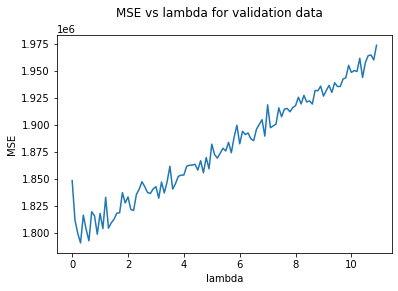

In [54]:
# the different lambda values for whom MSE will be calculated

lambda_max = 10
lambda_min = 0
lambda_step = 0.1
d = 9         # As it overfits in the case linear regression (a part)

MSE_list = []
lambda_list = []
for lambda_ in np.arange(lambda_min,lambda_max+1,lambda_step):

  rlsq = Ridge_Regression(d,lambda_)
  rlsq.fit(X1_train,Y_train)
  Y_ml = rlsq.predict(X1_validation)

  MSE_list += [np.mean((Y_ml - Y_validation)**2)]
  lambda_list+=[lambda_]

MSE_list = np.array(MSE_list)

best_lambda = lambda_list[np.argmin(MSE_list)]     # calculates best lambda

print("best lambda is : ",best_lambda)

fig, ax = plt.subplots()

plt.plot(lambda_list,MSE_list)

fig.suptitle('MSE vs lambda for validation data')
ax.set_xlabel('lambda')
ax.set_ylabel('MSE')

plt.show()


1)b) ii) Plotting the MSE of test data for varying lambda using the degree 9 polynomial model.

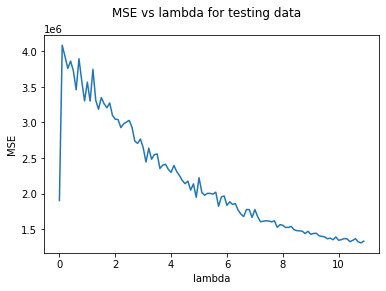

In [55]:
# the different lambda values for whom MSE will be calculated 

lambda_max = 10
lambda_min = 0
lambda_step = 0.1
d = 9

MSE_list = []
lambda_list = []
for lambda_ in np.arange(lambda_min,lambda_max+1,lambda_step):

  rlsq = Ridge_Regression(d,lambda_)
  rlsq.fit(X1_train,Y_train)
  Y_ml = rlsq.predict(X1_test)

  MSE_list += [np.mean((Y_ml - Y_test)**2)]
  lambda_list+=[lambda_]

MSE_list = np.array(MSE_list)

fig, ax = plt.subplots()

plt.plot(lambda_list,MSE_list)

fig.suptitle('MSE vs lambda for testing data')
ax.set_xlabel('lambda')
ax.set_ylabel('MSE')

plt.show()


1)b)iii) Finding the MSE of using the best model on training and testing data

In [57]:
rlsq = Ridge_Regression(d=9,lambda_ = best_lambda)
rlsq.fit(X1_train,Y_train)

# Testing data
Y_ml_test = rlsq.predict(X1_test)

MSE_test = np.mean((Y_ml_test - Y_test)**2)

print("MSE of testing data = ",MSE_test)

# Training data
Y_ml_train = rlsq.predict(X1_train)

MSE_train = np.mean((Y_ml_train-Y_train)**2)

print("MSE of training data = ",MSE_train)

MSE of testing data =  3761247.415932457
MSE of training data =  771385.3097971738


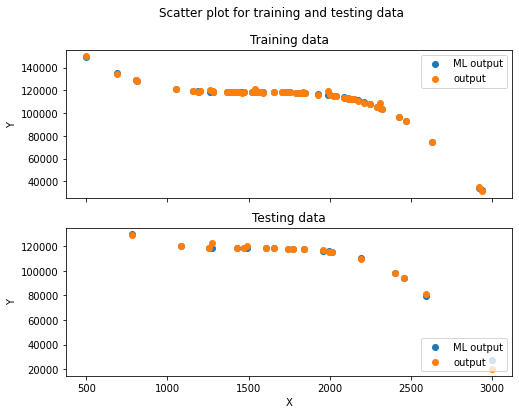

In [47]:
# create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# plot data on the subplots and set labels
axs[0].scatter(X1_train, Y_ml_train, label='ML output')
axs[0].scatter(X1_train, Y_train, label='output')
axs[0].set_ylabel('Y')

axs[1].scatter(X1_test, Y_ml_test, label='ML output')
axs[1].scatter(X1_test, Y_test, label='output')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

# create legends for the subplots
axs[0].legend(loc='upper right')
axs[1].legend(loc='lower right')
axs[0].set_title("Training data")
axs[1].set_title("Testing data")

# set the title for the figure
fig.suptitle('Scatter plot for training and testing data')

# show the plot
plt.show()

